### FROM COURSE ###

In [1]:
# import libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
heart = pd.read_csv('Heart.csv')
heart.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [3]:
# Read the "Heart.csv" dataset
heart = pd.read_csv('Heart.csv')

# Force the response into a binary indicator:
heart['AHD'] = 1*(heart['AHD'] == "Yes")

print(heart.shape)
# split into train and validation
heart_train, heart_val = train_test_split(heart, train_size = 0.75, random_state = 109)

print(heart_train.shape, heart_val.shape)

(303, 15)
(227, 15) (76, 15)


# Train a logistic regression model using to predict AHD from Chol and MaxHR with degree-3 polynomial features

In [4]:
predictors = ['Chol','MaxHR']

x_train = heart_train[predictors]
poly = PolynomialFeatures(degree=3,include_bias=False)
x_train_poly = poly.fit_transform(x_train)
y_train = heart_train['AHD']

lr = LogisticRegression(penalty=None, max_iter = 5000).fit(x_train_poly, y_train)
y_pred = lr.predict(x_train_poly)

print("Logistic Regression accuracy:", accuracy_score(y_train, y_pred))

Logistic Regression accuracy: 0.6784140969162996


Just took a little snipped of the cell after this. 

In [24]:
x1=np.linspace(heart[['Chol']].min(),heart[['Chol']].max(),100)
x2=np.linspace(heart[['MaxHR']].min(),heart[['MaxHR']].max(),100)
x1v, x2v = np.meshgrid(x1, x2)
X = np.c_[x1v.ravel(), x2v.ravel()]

X_dummy = poly.fit_transform(X)
X_dummy


array([[1.26000000e+02, 7.10000000e+01, 1.58760000e+04, ...,
        1.12719600e+06, 6.35166000e+05, 3.57911000e+05],
       [1.30424242e+02, 7.10000000e+01, 1.70104830e+04, ...,
        1.20774429e+06, 6.57468606e+05, 3.57911000e+05],
       [1.34848485e+02, 7.10000000e+01, 1.81841139e+04, ...,
        1.29107208e+06, 6.79771212e+05, 3.57911000e+05],
       ...,
       [5.55151515e+02, 2.02000000e+02, 3.08193205e+05, ...,
        6.22550274e+07, 2.26524024e+07, 8.24240800e+06],
       [5.59575758e+02, 2.02000000e+02, 3.13125028e+05, ...,
        6.32512558e+07, 2.28329292e+07, 8.24240800e+06],
       [5.64000000e+02, 2.02000000e+02, 3.18096000e+05, ...,
        6.42553920e+07, 2.30134560e+07, 8.24240800e+06]], shape=(10000, 9))

# Visualize the decision boundary

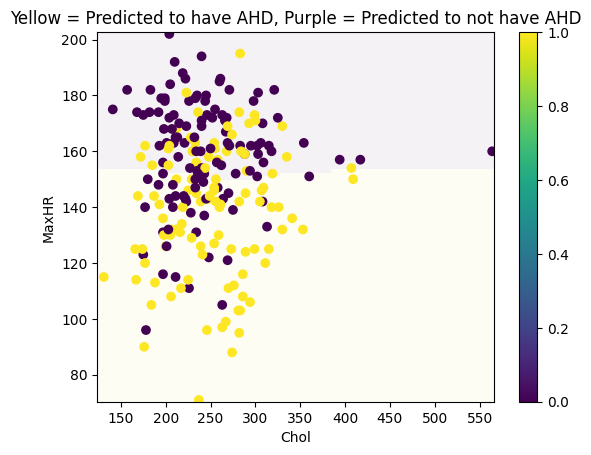

In [10]:
x1=np.linspace(heart[['Chol']].min(),heart[['Chol']].max(),100)
x2=np.linspace(heart[['MaxHR']].min(),heart[['MaxHR']].max(),100)
x1v, x2v = np.meshgrid(x1, x2)
X = np.c_[x1v.ravel(), x2v.ravel()]
X_dummy = poly.fit_transform(X)
yhat = lr.predict(X_dummy)

plt.pcolormesh(x1v, x2v, yhat.reshape(x1v.shape),alpha = 0.05) 
plt.scatter(heart_train['Chol'],heart_train['MaxHR'],c=heart_train['AHD'])
plt.ylabel("MaxHR")
plt.xlabel("Chol")
plt.title("Yellow = Predicted to have AHD, Purple = Predicted to not have AHD")
plt.colorbar()
plt.show()

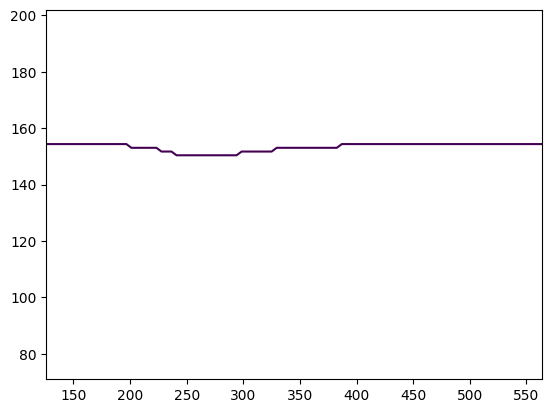

In [31]:
plt.contour(x1v, x2v, yhat.reshape(x1v.shape), levels = 0)

# Counterfactual question: which predictor is more likely to change the outcome of the classification? MaxHR, or Chol?

In [6]:
### edTest(test_modified_outputs) ###
# here we are going to create new dataframes based on x_train
# where we will modify each dataframe slightly
# by adding and subtracting by a standard deviation of a feature
# to see how the model outcomes change

def get_num_modified_outputs(predictor, x_change):

    #create a copy of the training data
    x_copy = x_train.copy()

    # modify the predictor by the value x_change
    x_copy[predictor] = x_copy[predictor] + x_change

    # apply the degree-3 polynomial transform to x_copy
    x_copy_poly = poly.fit_transform(x_copy)
    
    # create predictions for x_copy_poly using the logistic regression model (lr)
    y_pred_modified = lr.predict(x_copy_poly)
    
    # calculate the number of outputs that changed from y_pred to y_pred_modified
    n_changed_outputs = np.sum(np.abs(y_pred - y_pred_modified))

    return n_changed_outputs

# get standard deviation of each variable
# so that we can modify each variable
# while respecting the size/spread of that predictor in the data
# (another valid way would be to scale our data at the beginning of this exercise)
stdev_MaxHR = heart_train['MaxHR'].std()
stdev_Chol = heart_train['Chol'].std()

# get the number of modified outputs
# when modifying each variable up and down
# by 0.5 of its standard deviation
n_modify_chol_up = get_num_modified_outputs('Chol', 0.5*stdev_Chol)
n_modify_chol_down = get_num_modified_outputs('Chol', -0.5*stdev_Chol)
n_modify_maxhr_up = get_num_modified_outputs('MaxHR', 0.5*stdev_MaxHR)
n_modify_maxhr_down = get_num_modified_outputs('MaxHR', -0.5*stdev_MaxHR)

print('# outputs changed by increasing Chol:', n_modify_chol_up)
print('# outputs changed by decreasing Chol:', n_modify_chol_down)
print('# outputs changed by increasing MaxHR:', n_modify_maxhr_up)
print('# outputs changed by decreasing MaxHR:', n_modify_maxhr_down)


# outputs changed by increasing Chol: 5
# outputs changed by decreasing Chol: 5
# outputs changed by increasing MaxHR: 43
# outputs changed by decreasing MaxHR: 53


## Which feature is our model more sensitive to?

Chol (type answer = "A" in the cell below)

MaxHR (type answer = "B" in the cell below)

In [7]:
### edTest(test_sensitive_feature) ###
answer = "B"